170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


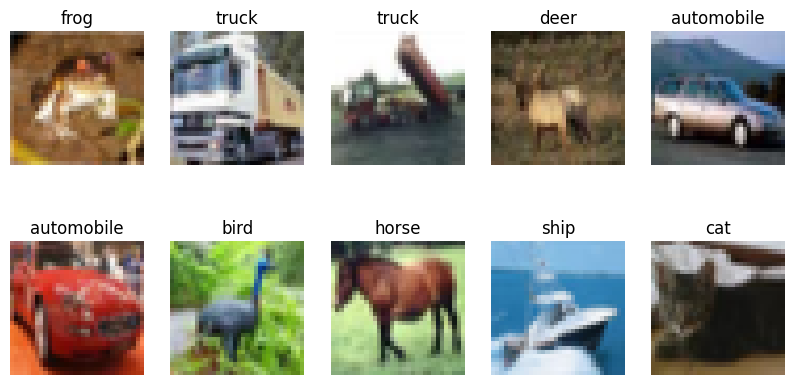

In [1]:
print("A creation by Priyanshu ")
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [2]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3462 - loss: 1.7717 - val_accuracy: 0.5457 - val_loss: 1.2562
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5714 - loss: 1.2134 - val_accuracy: 0.6141 - val_loss: 1.0872
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6342 - loss: 1.0295 - val_accuracy: 0.6627 - val_loss: 0.9659
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6764 - loss: 0.9269 - val_accuracy: 0.6756 - val_loss: 0.9182
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7057 - loss: 0.8447 - val_accuracy: 0.6858 - val_loss: 0.9000


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.3181 - loss: 1.8275 - val_accuracy: 0.5198 - val_loss: 1.3330
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5156 - loss: 1.3451 - val_accuracy: 0.5655 - val_loss: 1.2339
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.5749 - loss: 1.2026 - val_accuracy: 0.5838 - val_loss: 1.1649
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6079 - loss: 1.1110 - val_accuracy: 0.6420 - val_loss: 1.0177
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6308 - loss: 1.0489 - val_accuracy: 0.6421 - val_loss: 1.0273
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

    airplane       0.77      0.63      0.69      1000
  automobile       0.63      0.86      0.73      1000
        bird       0.77      0.33      0.46      1000
         cat       0.52      0.39      0.44      1000
        deer       0.62      0.50      0.55      1000

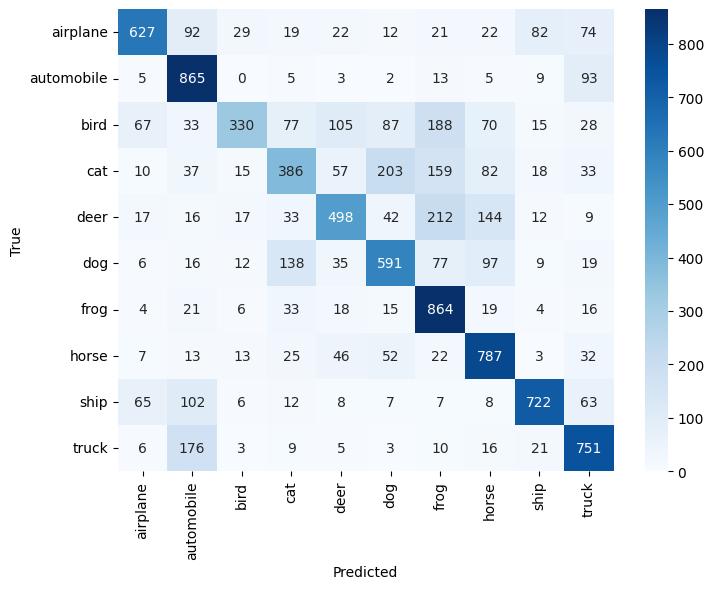

In [3]:
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)
datagen.fit(x_train)

model_aug = tf.keras.models.clone_model(model)
model_aug.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_aug = model_aug.fit(datagen.flow(x_train, y_train, batch_size=64),
                            epochs=5, validation_data=(x_test, y_test))

y_pred = np.argmax(model_aug.predict(x_test), axis=-1)

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


In [4]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(96,96,3))
base_model.trainable = False

from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

x_train_resized = tf.image.resize(x_train, (96,96))
x_test_resized = tf.image.resize(x_test, (96,96))

transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

transfer_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

transfer_model.fit(x_train_resized, y_train, epochs=3, validation_data=(x_test_resized, y_test))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.7088 - loss: 0.8514 - val_accuracy: 0.7950 - val_loss: 0.5924
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 11ms/step - accuracy: 0.8061 - loss: 0.5468 - val_accuracy: 0.7919 - val_loss: 0.5927
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8336 - loss: 0.4792 - val_accuracy: 0.7881 - val_loss: 0.6290


In [5]:
transfer_model.save("vision_ai_model.h5")

sample_img = np.expand_dims(x_test[0], axis=0)
pred_class = class_names[np.argmax(transfer_model.predict(tf.image.resize(sample_img, (96,96))))]
print(f"Predicted: {pred_class} | Actual: {class_names[y_test[0][0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted: cat | Actual: cat
